# Unsteady Flow Line Integral Convolution

In [1]:
#include <lodepng_config_cling.h>
#include <vtkm_config_cling.h>
#pragma cling add_include_path("/home/adios/Projects/vtkm-uflic/")

In [2]:
#include "Reader.h"
#include "UFLIC.h"

In [3]:
#include <VTKmXeusRender.h>


In [4]:
using VecType = vtkm::Float32;
constexpr int Size = 2;
using UFLICType = UFLIC<DoubleGyreField<VecType,Size>,VecType,Size>;
std::unique_ptr<VTKmXeusRender> renderer;
vtkm::Int32 x,y;
x = 128; y = 64;
std::shared_ptr<Reader<VecType, Size>> reader;
reader = std::shared_ptr<ReaderCalc<VecType, Size>>(new ReaderCalc<VecType, Size>("XGC_", vtkm::Id2(x,y), Bounds(0,x,0,y), vtkm::Vec<VecType,Size>(2,1), 240));

UFLICType uflic;


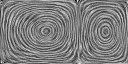

In [ ]:
[&](){
auto try_and_err = [&]() {
    renderer = std::make_unique<VTKmXeusRender>();
    uflic.do_print = true;
    auto render = [&](std::string name, auto array, vtkm::Id x, vtkm::Id y ){
        renderer->Display(array, x,y);
    };
    uflic.callback = render;
    uflic.run(std::shared_ptr(reader));

};
try_and_err();
}();

![I am limited by thet technology of my time](howardstark.png)